# Por que um professor da rede pública do DF sai da escola em que está?
<b><hr/></b>

### Ítalo Barreto

## 1. Dados

### 1.1 Micro censo

Anualmente o Ministério da Educação faz um censo do ensino no Brasil. 

Os arquivos desse censo estão disponíveis no site do [InepData](https://inepdata.inep.gov.br/).

O código para download e extração dos arquivos está em raw_data/inep_files.py

O arquivo model_vars.csv - base do presente estudo - é feita pela execução arquivo MontagemDasBases.ipynb

Nesse projeto irei investigar as causas do por que em 2017 cerca de 24% dos professores não estavam mais em pelo menos uma das escolas que davam aula em 2015.

### 1.2 Why?

Minha motivação originou-se de ouvir uma conversa entre minha esposa e algumas amigas que são professoras concursadas da rede pública do DF. Nessa conversa todas elogiavam uma escola próxima à minha casa e quando _virou_ o ano todas elas saíram da escola.

### 1.3 Verificando os pré requisitos

In [2]:
#Importação das bibliotecas
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import os
from glob import glob
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy import stats
from sklearn import metrics
from tqdm import tqdm
from IPython.core.display import display, HTML
import folium
from sklearn import cluster 
from sklearn.preprocessing import MinMaxScaler
import folium
import scipy
from tabulate import tabulate

#Arquivos criados para deixar o codigo do notebook mais clean.
import modelagem
from raw_data import constantes as CONST
from educ_utils import df_inep_utils as DIU
from educ_utils import Visualizacao

In [8]:
# o arquivo que é pré requisito existe?
if os.path.exists(CONST.PATH_DF_CSV +'model_vars.csv'):
    print('O arquivo existe, podemos continuar.')
else:
    raise Exception(f'Arquivo {CONST.PATH_DF_CSV}model_vars.csv inexistente, meios de ajuste: \n-executar o código de MontagemDasBases.ipynb \n-fazer o download do arquivo https://www.dropbox.com/s/igdnw2gu6tybq2z/model_vars.csv?dl=0')

O arquivo existe, podemos continuar.


In [3]:
#Configuracao para mostrar duas casas decimais.
pd.options.display.float_format = '{:.2f}'.format

### 1.4 Dataset


### 1.4.1 Load do Dataset
Agora que sabemos que o arquivo model_vars.csv existe, iremos carregá-lo, ver quantas linhas e colunas possui e ainda os tipos das colunas.

In [4]:
#load do arquivo
mv = pd.read_csv(f'{CONST.PATH_DF_CSV}model_vars.csv')
mv.shape

(8187, 85)

In [5]:
#head do arquivo
mv.head()

,CO_PESSOA_FISICA,CO_ENTIDADE,NU_QTD_TURMAS_IN_TURNO_0,NU_QTD_TURMAS_IN_TURNO_1,NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS,NU_MEDIA_TURMAS_NU_QTD_ALUNOS,NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0,NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_1,NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2,NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_3,...,NU_PROP_PSS_MULHERES_SCHL,NU_PROP_PSS_MULHERES_RSP_SCHL,NU_PROP_PSS_ABXO_12ANOS_SCHL,NU_PROP_PSS_ACIMA_65ANOS_SCHL,NU_PROP_PSS_ACIMA_90ANOS_SCHL,ROTULO_ESCOLA_SCHL,IN_SAIU_ESCOLA,NU_QTD_VEZES_PROF_ESC,LAT,LONG
0,115161698917,53001206,0.00,11.00,14.00,43.55,0.09,0.00,0.00,0.12,...,0.55,0.16,0.12,0.13,0.00,0,False,0.00,-15.83,-47.90
1,115105891200,53001206,0.00,6.00,14.00,44.50,0.08,0.00,0.00,0.14,...,0.55,0.16,0.12,0.13,0.00,0,True,0.20,-15.83,-47.90
2,115076010000,53001206,7.00,0.00,15.00,51.71,0.11,0.00,0.00,0.16,...,0.55,0.16,0.12,0.13,0.00,0,True,0.80,-15.83,-47.90
3,117159444530,53001206,0.00,6.00,14.00,48.17,0.14,0.00,0.00,0.11,...,0.55,0.16,0.12,0.13,0.00,0,False,0.20,-15.83,-47.90
4,115075882756,53001206,6.00,0.00,14.34,53.00,0.07,0.00,0.01,0.14,...,0.55,0.16,0.12,0.13,0.00,0,False,0.80,-15.83,-47.90


In [6]:
display(mv.dtypes)

CO_PESSOA_FISICA                                int64
CO_ENTIDADE                                     int64
NU_QTD_TURMAS_IN_TURNO_0                      float64
NU_QTD_TURMAS_IN_TURNO_1                      float64
NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS            float64
NU_MEDIA_TURMAS_NU_QTD_ALUNOS                 float64
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0       float64
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_1       float64
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2       float64
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_3       float64
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_4       float64
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_5       float64
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_6       float64
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_7       float64
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_8       float64
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_9       float64
NU_QTD_TURMAS_PROF_ESCOLA                     float64
IN_NASCEU_DF_PROF                               int64
IN_ESPECIALIZACAO_PROF      

### 1.4.2 Ajustes no Dataset

O arquivo csv vem sem indexação e com a _tipagem_ _default_.

In [7]:
#indexa corretamente

mv.set_index(['CO_PESSOA_FISICA','CO_ENTIDADE'],inplace=True)

In [8]:
#ajuste na tipagem para melhorar a performance
#transformei o booleano em int para calcular as descritivas automaticamente
mv.IN_SAIU_ESCOLA = mv.IN_SAIU_ESCOLA.astype(np.int8)
mv = DIU.ajusta_colunas_int_df_inep(mv)

### 1.4.3 Estrutura do Dataset

Aqui vamos investigar o conteúdo e os nomes das colunas.

In [9]:
#mostra as 5 primeiras linhas do DataFrame
mv.head()

,,NU_QTD_TURMAS_IN_TURNO_0,NU_QTD_TURMAS_IN_TURNO_1,NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS,NU_MEDIA_TURMAS_NU_QTD_ALUNOS,NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0,NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_1,NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2,NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_3,NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_4,NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_5,...,NU_PROP_PSS_MULHERES_SCHL,NU_PROP_PSS_MULHERES_RSP_SCHL,NU_PROP_PSS_ABXO_12ANOS_SCHL,NU_PROP_PSS_ACIMA_65ANOS_SCHL,NU_PROP_PSS_ACIMA_90ANOS_SCHL,ROTULO_ESCOLA_SCHL,IN_SAIU_ESCOLA,NU_QTD_VEZES_PROF_ESC,LAT,LONG
CO_PESSOA_FISICA,CO_ENTIDADE,,,,,,,,,,,,,,,,,,,,,
115161698917,53001206,0.00,11.00,14.00,43.53,0.09,0.00,0.00,0.12,0.00,0.00,...,0.55,0.16,0.12,0.13,0.00,0,0,0.00,-15.83,-47.91
115105891200,53001206,0.00,6.00,14.00,44.50,0.08,0.00,0.00,0.14,0.00,0.00,...,0.55,0.16,0.12,0.13,0.00,0,1,0.20,-15.83,-47.91
115076010000,53001206,7.00,0.00,15.00,51.72,0.11,0.00,0.00,0.16,0.00,0.00,...,0.55,0.16,0.12,0.13,0.00,0,1,0.80,-15.83,-47.91
117159444530,53001206,0.00,6.00,14.00,48.16,0.14,0.00,0.00,0.11,0.00,0.00,...,0.55,0.16,0.12,0.13,0.00,0,0,0.20,-15.83,-47.91
115075882756,53001206,6.00,0.00,14.34,53.00,0.07,0.00,0.01,0.14,0.00,0.00,...,0.55,0.16,0.12,0.13,0.00,0,0,0.80,-15.83,-47.91


In [10]:
#Dá uma visão geral das colunas do Dataset, fiz um transpose para "ver melhor" os dados
mv.describe().T

,count,mean,std,min,25%,50%,75%,max
NU_QTD_TURMAS_IN_TURNO_0,8183.00,2.27,3.80,0.00,0.00,1.00,2.00,28.00
NU_QTD_TURMAS_IN_TURNO_1,8183.00,1.61,3.24,0.00,0.00,0.00,1.00,26.00
NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS,8183.00,inf,4.27,0.00,7.00,8.00,10.00,16.00
NU_MEDIA_TURMAS_NU_QTD_ALUNOS,8183.00,inf,inf,1.00,22.00,31.61,41.75,910.00
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0,8183.00,0.11,0.13,0.00,0.00,0.07,0.17,1.00
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_1,8183.00,0.16,0.24,0.00,0.00,0.00,0.31,1.00
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2,8183.00,0.10,0.24,0.00,0.00,0.00,0.01,1.00
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_3,8183.00,0.06,0.08,0.00,0.00,0.00,0.13,0.50
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_4,8183.00,0.12,0.21,0.00,0.00,0.00,0.15,1.00
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_5,8183.00,0.08,0.15,0.00,0.00,0.00,0.05,0.88


#### Colunas do Dataframe

Para a nomenclatura das colunas segui o mesmo padrão do Inep, onde os prefixos:

* NU: representam colunas numéricas (exceção LAT e LONG).
* IN: representam indicadores (1 - Sim, 0 - Não).
* CO: código (lista de valores que significam uma string).
* TP: tipo (também lista de valores, a exceção é TP_COR_RACA_X_PROF que é um indicador).

Para os sufixos adotei o padrão:
* PROF: dado do professor.
* SCHL: dado da escola (exceção dos campos LAT e LONG).

#### Nomes das colunas

- NU_QTD_TURMAS_IN_TURNO_0: quantidade de turmas no matutino.
- NU_QTD_TURMAS_IN_TURNO_1: quantidade de turmas no vespertino.
- NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS: média da quantidade de disciplinas que cada uma das turmas que o professor dá aula naquela escola possui.
- NU_MEDIA_TURMAS_NU_QTD_ALUNOS: média da quantidade de alunos em cada uma das turmas que o professor dá aula naquela escola.
##### Média nas turmas em que o professor dava aula na escola da"razão entre o número de alunos de um determinado cluster e o total de alunos da turma". O significado dos cluters (rótulos) está bem descrito no arquivo de montagem do dataset.
- NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0:
- NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_1:
- NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2:
- NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_3:
- NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_4:
- NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_5:
- NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_6:
- NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_7:
- NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_8:
- NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_9:
<br/><br/>
- NU_QTD_TURMAS_PROF_ESCOLA: quantidade de turmas que o professor ministra aulas.
- IN_NASCEU_DF_PROF: indicador se o professor nasceu no DF.
- IN_ESPECIALIZACAO_PROF: indicador se o professor possui alguma especialização.

- TP_COR_RACA_1_PROF: indicador se a COR/RAÇA do professor é branca.
- TP_COR_RACA_0_PROF: indicador se a COR/RAÇA do professor não informada.
- TP_COR_RACA_3_PROF: indicador se a COR/RAÇA do professor é parda.
- NU_IDADE_REFERENCIA_PROF: idade do professor ao final do ano do censo.
- CO_CLASSE_PROF: o cluster que o professor foi colocado, os clusters estão bem descritos no arquivo de montagem da base.
- IN_ESGOTO_REDE_PUBLICA_SCHL: indicador se o esgoto da escola é coletado pela rede pública.
- IN_ESGOTO_FOSSA_SCHL: inicador se o esgoto da escola é coletado em fossas.
- IN_LABORATORIO_INFORMATICA_SCHL: indicador se a escola possui laboratório de informática.
- IN_LABORATORIO_CIENCIAS_SCHL: indicador se a escola possui labiratório de ciências.
- IN_SALA_ATENDIMENTO_ESPECIAL_SCHL: indicador se a escola possui sala de atendimento especial.
- IN_QUADRA_ESPORTES_COBERTA_SCHL: indicador se a escola possui quadra de esportes coberta.
- IN_QUADRA_ESPORTES_DESCOBERTA_SCHL: indicador se a escola possui quadra de esportes descoberta.
- IN_QUADRA_ESPORTES_SCHL: indicador se a escola possui quadra de esportes.
- IN_BIBLIOTECA_SCHL: indicador se a escola possui biblioteca.
- IN_SALA_LEITURA_SCHL: indicador se a escola possui sala de leitura.
- IN_BIBLIOTECA_SALA_LEITURA_SCHL: indicador se a escola possui biblioteca e sala de leitura.
- IN_PARQUE_INFANTIL_SCHL: indicador se a escola possui parque infantil.
- IN_BANHEIRO_EI_SCHL: indicador se a escola possui banheiro especial.
- IN_BANHEIRO_PNE_SCHL: indicador se a escola possui banheiro para Portadores de Necessidades Especiais (PNE).
- IN_DEPENDENCIAS_PNE_SCHL: indicador se a escola possui dependências para PNE.
- IN_BANHEIRO_CHUVEIRO_SCHL: indicador se a escola possui chuveiro.
- IN_REFEITORIO_SCHL: indicador se a escola possui refeitório.
- IN_DESPENSA_SCHL: indicador se a escola possui despensa.
- IN_ALMOXARIFADO_SCHL: indicador se a escola possui almoxarifado.
- IN_AUDITORIO_SCHL: indicador se a escola possui auditório.
- IN_PATIO_COBERTO_SCHL: indicador se a escola possui pátio coberto.
- IN_PATIO_DESCOBERTO_SCHL: indicador se a escola possui pátio descoberto.
- IN_AREA_VERDE_SCHL: indicador se a escola possui área verde.
- NU_SALAS_EXISTENTES_SCHL: quantidade de salas existentes na escola.
- IN_EQUIP_VIDEOCASSETE_SCHL: indicador se a escola possui equipamento de vídeo cassete.
- IN_EQUIP_PARABOLICA_SCHL: indicador se a escola possui antena parabólica.
- IN_EQUIP_RETROPROJETOR_SCHL: indicador se a escola possui equipamento de retroprojetor.
- IN_EQUIP_IMPRESSORA_MULT_SCHL: indicador se a escola possui impressora multifuncional.
- IN_EQUIP_FAX_SCHL: indicador se a escola possui aparelho de fax.
- IN_EQUIP_FOTO_SCHL: indicador se a escola possui fotocopiadora.
- NU_COMPUTADOR_SCHL: quantidade de computadores na escola.
- NU_COMP_ADMINISTRATIVO_SCHL: quantidade de computadores para fins administrativos.
- NU_COMP_ALUNO_SCHL: quantidade de computadores para uso em aula.
- NU_FUNCIONARIOS_SCHL: quantidade de funcionários da escola.
- TP_AEE_SCHL: indicador se a escola oferece Atendimento Educacional Especializado (AEE).
- TP_ATIVIDADE_COMPLEMENTAR_SCHL: indicador se a escola oferece Atividade Complementar.
- IN_FINAL_SEMANA_SCHL: indicador se há aula de final de semana na escola.
- NU_PROP_FUNS_SALAS_UTZD_SCHL: razão entre quantidade de funcionários na escola e a quantidade de salas utilizadas na escola.
- NU_PROP_CPU_SALAS_UTZD_SCHL: razão entre quantidade de computadores na escola e a quantidade de salas utilizadas na escola.

##### Dados obtidos do censo 2010 do IBGE.
- NU_QTD_SETORES_CENSITARIOS_SCHL: quantidade de setores censitários (IBGE) num raio de 2,5km ou a metade da distância da escola mais próxima (o que for maior).
- NU_MEDIA_DISTANCIA_ESCOLA_SETOR_SCHL: média das distâncias, em km, entre o centróide do setor censitário e a escola.
- NU_MEDIANA_RENDA_MEDIA_SCHL: mediana da renda média dos domicílios dos setores censitários ao redor da escola.
- NU_MEDIANA_QTD_DOMICILIOS_SCHL: mediana da quantidade de domicílios nos setores censitários ao redor da escola.
- NU_MEDIANA_QTD_PESSOAS_SCHL: mediana da quantidade de pessoas nos setores censitários ao redor da escola.
- NU_SOMA_QTD_DOMICILIOS_SCHL: quantidade total de domícilios ao redor da escola.
- NU_SOMA_QTD_PESSOAS_SCHL: população ao redor da escola.
- NU_PROP_DOM_ALUGADOS_SCHL: razão entre quantidade de domicílios alugados e a quantidade total de domicílios ao redor da escola.
- NU_PROP_DOM_CEDIDOS_SCHL: razão entre quantidade de domicílios cedidos e a quantidade total de domicílios ao redor da escola.
- NU_PROP_DOM_EM_AQUISICAO_SCHL: razão entre quantidade de domicílios em aquisição (financiados) e a quantidade total de domicílios ao redor da escola.
- NU_PROP_DOM_RENDA_PERCAPITA_ACIMA_5SM_SCHL: razão entre quantidade de domicílios cuja renda _per capita_ é acima de 5 salários mínimos e a quantidade total de domicílios ao redor da escola.
- NU_PROP_DOM_RENDA_PERCAPITA_ABXO_1SM_SCHL:  razão entre quantidade de domicílios cuja renda _per capita_ é abaixo de 1 salário mínimo e a quantidade total de domicílios ao redor da escola.
- NU_PROP_PSS_MULHERES_SCHL: razão entre a quantidade de mulheres e a população ao redor da escola.
- NU_PROP_PSS_MULHERES_RSP_SCHL: razão entre a quantidade de mulheres responsáveis pelo domicílio e a população ao redor da escola.
- NU_PROP_PSS_ABXO_12ANOS_SCHL: razão entre a quantidade de pessoas abaixo dos 12 anos (crianças) e a população ao redor da escola.
- NU_PROP_PSS_ACIMA_65ANOS_SCHL: razão entre a quantidade de pessoas acima de 65 anos e a população ao redor da escola.
- NU_PROP_PSS_ACIMA_90ANOS_SCHL: razão entre a quantidade de pessoas acima de 90 anos e a população ao redor da escola.
<br/><br/>
- ROTULO_ESCOLA_SCHL: cluster a que pertence a escola.
- IN_SAIU_ESCOLA: indicador se o professor não estava naquela escola em 2017.
- NU_QTD_VEZES_PROF_ESC: número de vezes que o registro professor/escola apareceu no censo desde 2007.
- LAT: latitude em que se encontra a escola.
- LONG: longitude em que se encontra a escola. 

Aqui já vemos que são 8.187 professores/turmas e que em 2017 cerca de 24% dos professores saíram de alguma escola que estavam em 2015.

In [11]:
#vamos renomear as colunas que são exceções ao padrão de nomenclatura.
mv.rename(columns={'TP_COR_RACA_1_PROF' : 'IN_TP_COR_RACA_BRANCA_PROF',
                   'TP_COR_RACA_0_PROF' : 'IN_TP_COR_RACA_NAO_INFMD_PROF' ,
                   'TP_COR_RACA_3_PROF' : 'IN_TP_COR_RACA_PARDA_PROF' ,
                   'TP_AEE_SCHL' : 'IN_AEE_SCHL',
                   'TP_ATIVIDADE_COMPLEMENTAR_SCHL' : 'IN_ATIVIDADE_COMPLEMENTAR_SCHL',
                   'LAT': 'NU_LATITUDE_SCHL',
                   'LONG' : 'NU_LONGITUDE_SCHL',
                   'CO_CLASSE_PROF' : 'CO_CLUSTER_PROF',
                   'ROTULO_ESCOLA_SCHL' : 'CO_CLUSTER_SCHL'},inplace=True)

#Cria um padrão de nomenclatura para as colunas com dados dos setores censitários.
colunas_setores_censitarios = [
    'NU_QTD_SETORES_CENSITARIOS_SCHL',
    'NU_MEDIA_DISTANCIA_ESCOLA_SETOR_SCHL',
    'NU_MEDIANA_RENDA_MEDIA_SCHL',
    'NU_MEDIANA_QTD_DOMICILIOS_SCHL',
    'NU_MEDIANA_QTD_PESSOAS_SCHL',
    'NU_SOMA_QTD_DOMICILIOS_SCHL',
    'NU_SOMA_QTD_PESSOAS_SCHL',
    'NU_PROP_DOM_ALUGADOS_SCHL',
    'NU_PROP_DOM_CEDIDOS_SCHL',
    'NU_PROP_DOM_EM_AQUISICAO_SCHL',
    'NU_PROP_DOM_RENDA_PERCAPITA_ACIMA_5SM_SCHL',
    'NU_PROP_DOM_RENDA_PERCAPITA_ABXO_1SM_SCHL',
    'NU_PROP_PSS_MULHERES_SCHL',
    'NU_PROP_PSS_MULHERES_RSP_SCHL',
    'NU_PROP_PSS_ABXO_12ANOS_SCHL',
    'NU_PROP_PSS_ACIMA_65ANOS_SCHL',
    'NU_PROP_PSS_ACIMA_90ANOS_SCHL'
    ]
mv.rename(columns={col : col[:-5] + '_SC' + col[-5:] for col in colunas_setores_censitarios},inplace=True)


In [12]:
#Os códigos dos clusters são categorias
for c in mv.columns:
    if c.startswith('CO_'):
        mv[c] = pd.Categorical(mv[c])

## 2. Gráficos e análises

### 2.1 Gráficos univariados

#### 2.1.1 Professores


In [13]:
#As colunas com final _PROF são exclusivas dos professores.
prof = mv.reset_index().drop('CO_ENTIDADE',axis=1)[
            [c for c in mv.columns if c.endswith('_PROF')] +['CO_PESSOA_FISICA']]\
            .drop_duplicates()\
            .set_index('CO_PESSOA_FISICA')
display(prof.shape)
display(prof.head())

(7650, 7)

,IN_NASCEU_DF_PROF,IN_ESPECIALIZACAO_PROF,IN_TP_COR_RACA_BRANCA_PROF,IN_TP_COR_RACA_NAO_INFMD_PROF,IN_TP_COR_RACA_PARDA_PROF,NU_IDADE_REFERENCIA_PROF,CO_CLUSTER_PROF
CO_PESSOA_FISICA,,,,,,,
115161698917,1,0.00,0,1,0,41,6
115105891200,0,0.00,0,1,0,45,3
115076010000,0,0.00,1,0,0,51,5
117159444530,0,1.00,1,0,0,51,5
115075882756,1,1.00,0,0,1,49,7


'0.0% de registros nulos'

'Variância: 0.25002514746256715'

,qtd,pc
1,3846,0.50
0,3804,0.50


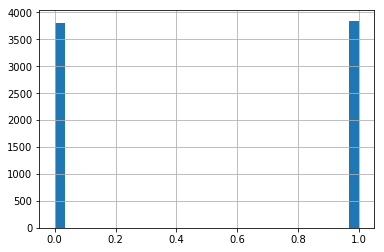

'0.0% de registros nulos'

'Variância: 0.247802734375'

,qtd,pc
1.00,4188,0.55
0.00,3462,0.45


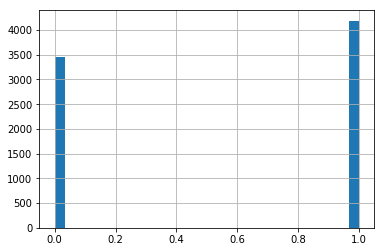

'0.0% de registros nulos'

'Variância: 0.2139528000157225'

,qtd,pc
0,5278,0.69
1,2372,0.31


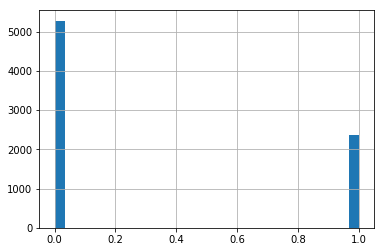

'0.0% de registros nulos'

'Variância: 0.22354325440465111'

,qtd,pc
0,5070,0.66
1,2580,0.34


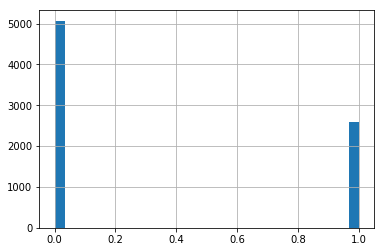

'0.0% de registros nulos'

'Variância: 0.20987041750940152'

,qtd,pc
0,5358,0.70
1,2292,0.30


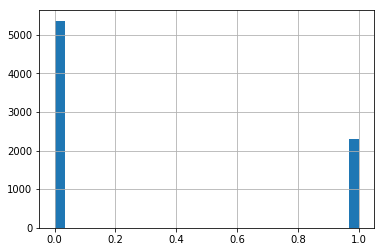

'0.0% de registros nulos'

'Variância: 57.03131531568482'

count   7650.00
mean      42.96
std        7.55
min       24.00
25%       38.00
50%       43.00
75%       48.00
max       69.00
Name: NU_IDADE_REFERENCIA_PROF, dtype: float64

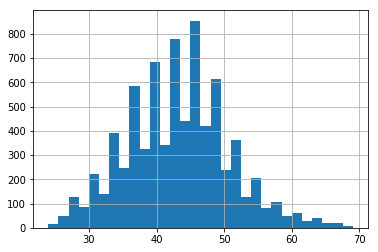

'0.0% de registros nulos'

Não foi possível calcular a variância.


,qtd,pc
5,1213,0.16
1,1159,0.15
0,1125,0.15
7,891,0.12
4,880,0.12
3,825,0.11
6,794,0.10
2,763,0.10


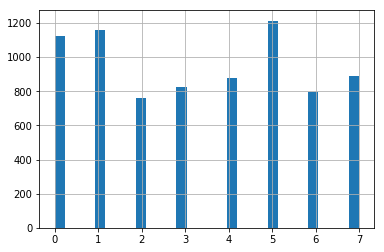

In [14]:
#Como são muitas variáveis iremos fazer uma visualização padrão
#a partir dessas informações já podemos fazer algumas observações interessantes.
Visualizacao.explora_df(prof)

In [15]:
#ktest para testar a normalidade das idades.
x = prof.NU_IDADE_REFERENCIA_PROF.values
ks_results = scipy.stats.kstest(x, cdf='norm')

matrix_ks = [
    ['', 'DF', 'Test Statistic', 'p-value'],
    ['Sample Data', len(x) - 1, ks_results[0], ks_results[1]]
]

display(HTML(tabulate(matrix_ks, tablefmt="html")))

,DF,Test Statistic,p-value
Sample Data,7649,1.0,0.0


#### Algumas observações interessantes:

- Os professores/escola são menos jovens do que eu esperava. Mínimo 24, percentil 25 é 38 e média e mediana de 43, a distribuição é praticamente normal.
- Somente 5% se consideram da COR/RACA preta (5% que não são brancos, nem pardos, nem não informado).
- 50% dos professores não nasceram no DF.
- Quase a metade não possui especialização.

#### 2.1.2 Escolas

In [16]:
#criação de um dataframe com os dados das escolas
schl = mv.reset_index().drop('CO_PESSOA_FISICA',axis=1)[
            [c for c in mv.columns if c.endswith('_SCHL')] +['CO_ENTIDADE']]\
            .drop_duplicates()\
            .set_index('CO_ENTIDADE')
#tamanho da tabela
display(schl.shape)
#lista as 5 primeiras linhas
display(schl.head())
#mostra todas as colunas e os tipos
HTML(tabulate([[col,schl[col].dtype] for col in schl.columns],tablefmt='html'))

(498, 59)

,IN_ESGOTO_REDE_PUBLICA_SCHL,IN_ESGOTO_FOSSA_SCHL,IN_LABORATORIO_INFORMATICA_SCHL,IN_LABORATORIO_CIENCIAS_SCHL,IN_SALA_ATENDIMENTO_ESPECIAL_SCHL,IN_QUADRA_ESPORTES_COBERTA_SCHL,IN_QUADRA_ESPORTES_DESCOBERTA_SCHL,IN_QUADRA_ESPORTES_SCHL,IN_BIBLIOTECA_SCHL,IN_SALA_LEITURA_SCHL,...,NU_PROP_DOM_RENDA_PERCAPITA_ACIMA_5SM_SC_SCHL,NU_PROP_DOM_RENDA_PERCAPITA_ABXO_1SM_SC_SCHL,NU_PROP_PSS_MULHERES_SC_SCHL,NU_PROP_PSS_MULHERES_RSP_SC_SCHL,NU_PROP_PSS_ABXO_12ANOS_SC_SCHL,NU_PROP_PSS_ACIMA_65ANOS_SC_SCHL,NU_PROP_PSS_ACIMA_90ANOS_SC_SCHL,CO_CLUSTER_SCHL,NU_LATITUDE_SCHL,NU_LONGITUDE_SCHL
CO_ENTIDADE,,,,,,,,,,,,,,,,,,,,,
53001206,1.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,...,0.66,0.04,0.55,0.16,0.12,0.13,0.00,0,-15.83,-47.91
53011988,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,...,0.04,0.56,0.51,0.13,0.23,0.05,0.00,31,-15.66,-48.19
53068181,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,...,0.02,0.60,0.51,0.12,0.22,0.03,0.00,31,-16.03,-48.03
53013980,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.70,0.03,0.55,0.17,0.12,0.12,0.00,0,-15.80,-47.91
53001893,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,...,0.69,0.03,0.55,0.17,0.12,0.12,0.00,0,-15.81,-47.91


IN_ESGOTO_REDE_PUBLICA_SCHL,float16
IN_ESGOTO_FOSSA_SCHL,float16
IN_LABORATORIO_INFORMATICA_SCHL,float16
IN_LABORATORIO_CIENCIAS_SCHL,float16
IN_SALA_ATENDIMENTO_ESPECIAL_SCHL,float16
IN_QUADRA_ESPORTES_COBERTA_SCHL,float16
IN_QUADRA_ESPORTES_DESCOBERTA_SCHL,float16
IN_QUADRA_ESPORTES_SCHL,float16
IN_BIBLIOTECA_SCHL,float16
IN_SALA_LEITURA_SCHL,float16
IN_BIBLIOTECA_SALA_LEITURA_SCHL,float16


'0.0% de registros nulos'

'Variância: 0.126708984375'

,qtd,pc
1.00,424,0.85
0.00,74,0.15


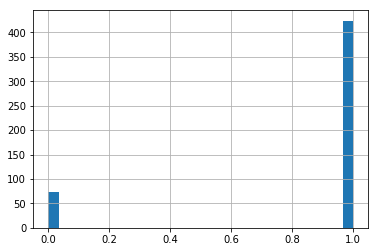

'0.0% de registros nulos'

'Variância: 0.126708984375'

,qtd,pc
0.00,424,0.85
1.00,74,0.15


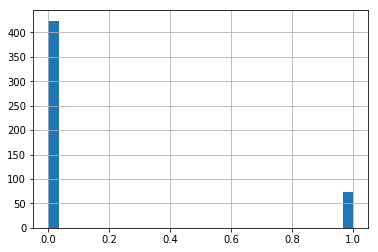

'0.0% de registros nulos'

'Variância: 0.149658203125'

,qtd,pc
1.00,407,0.82
0.00,91,0.18


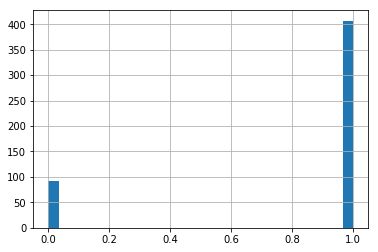

'0.0% de registros nulos'

'Variância: 0.14697265625'

,qtd,pc
0.00,409,0.82
1.00,89,0.18


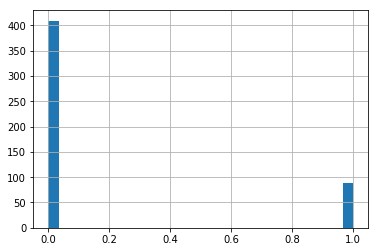

'0.0% de registros nulos'

'Variância: 0.1746826171875'

,qtd,pc
1.00,386,0.78
0.00,112,0.22


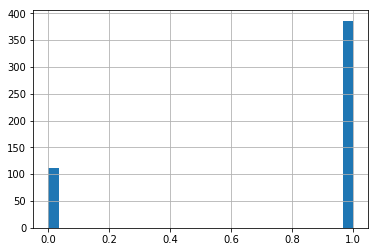

'0.0% de registros nulos'

'Variância: 0.1832275390625'

,qtd,pc
0.00,378,0.76
1.00,120,0.24


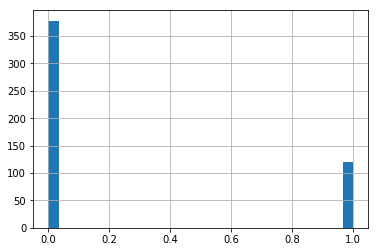

'0.0% de registros nulos'

'Variância: 0.2489013671875'

,qtd,pc
0.00,269,0.54
1.00,229,0.46


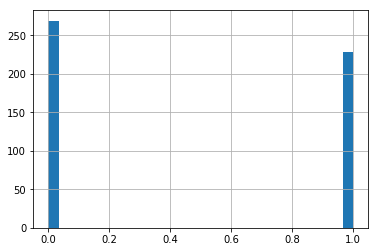

'0.0% de registros nulos'

'Variância: 0.23193359375'

,qtd,pc
1.00,317,0.64
0.00,181,0.36


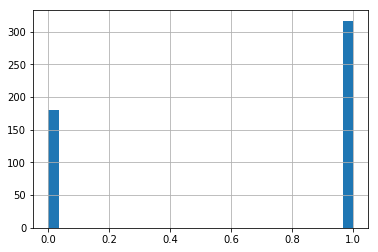

'0.0% de registros nulos'

'Variância: 0.2132568359375'

,qtd,pc
0.00,345,0.69
1.00,153,0.31


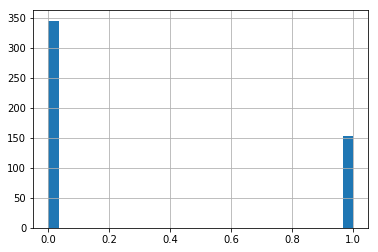

'0.0% de registros nulos'

'Variância: 0.1951904296875'

,qtd,pc
1.00,366,0.73
0.00,132,0.27


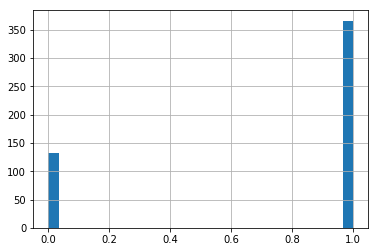

'0.0% de registros nulos'

'Variância: 0.10772705078125'

,qtd,pc
1.00,437,0.88
0.00,61,0.12


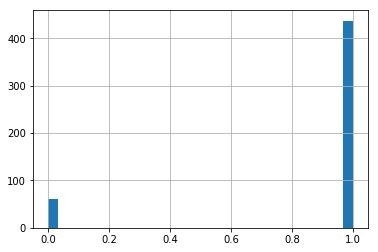

'0.0% de registros nulos'

'Variância: 0.250244140625'

,qtd,pc
1.00,257,0.52
0.00,241,0.48


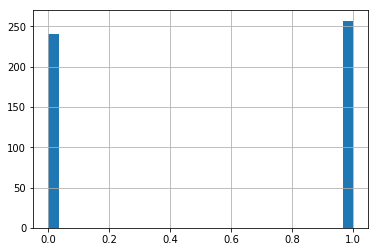

'0.0% de registros nulos'

'Variância: 0.228271484375'

,qtd,pc
0.00,323,0.65
1.00,175,0.35


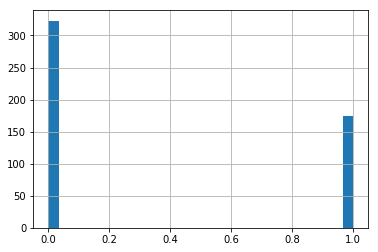

'0.0% de registros nulos'

'Variância: 0.1712646484375'

,qtd,pc
1.00,389,0.78
0.00,109,0.22


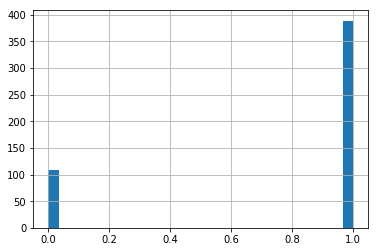

'0.0% de registros nulos'

'Variância: 0.2279052734375'

,qtd,pc
1.00,324,0.65
0.00,174,0.35


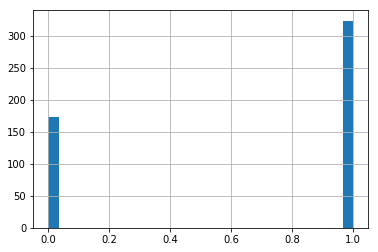

'0.0% de registros nulos'

'Variância: 0.25048828125'

,qtd,pc
1.00,252,0.51
0.00,246,0.49


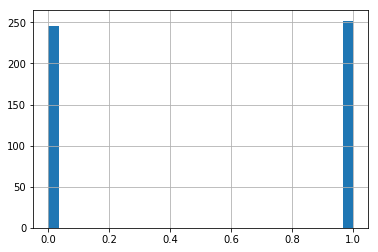

'0.0% de registros nulos'

'Variância: 0.164306640625'

,qtd,pc
0.00,395,0.79
1.00,103,0.21


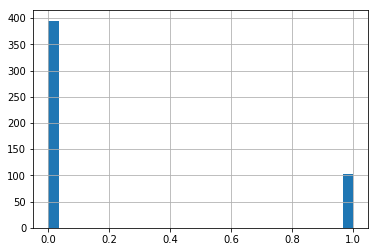

'0.0% de registros nulos'

'Variância: 0.221923828125'

,qtd,pc
1.00,333,0.67
0.00,165,0.33


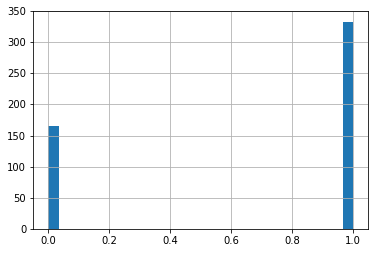

'0.0% de registros nulos'

'Variância: 0.19970703125'

,qtd,pc
0.00,361,0.72
1.00,137,0.28


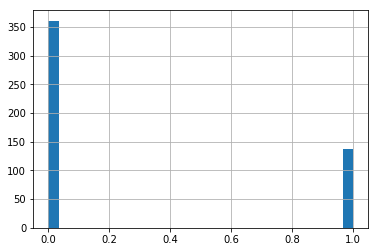

'0.0% de registros nulos'

'Variância: 0.10321044921875'

,qtd,pc
0.00,440,0.88
1.00,58,0.12


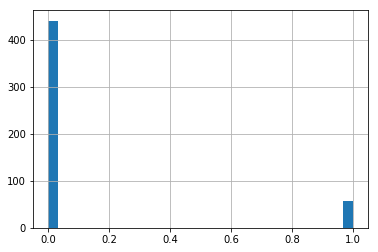

'0.0% de registros nulos'

'Variância: 0.1961669921875'

,qtd,pc
1.00,365,0.73
0.00,133,0.27


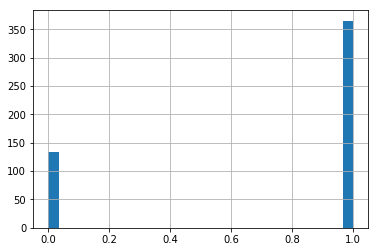

'0.0% de registros nulos'

'Variância: 0.24169921875'

,qtd,pc
0.00,296,0.59
1.00,202,0.41


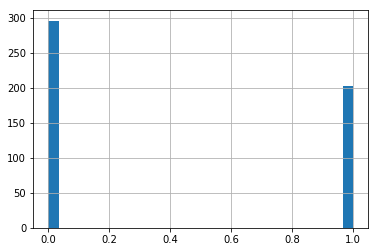

'0.0% de registros nulos'

'Variância: 0.2489013671875'

,qtd,pc
0.00,269,0.54
1.00,229,0.46


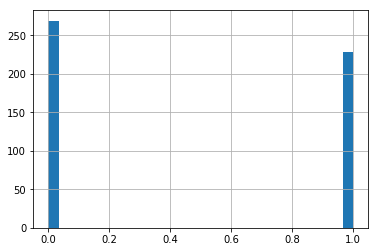

'0.0% de registros nulos'

'Variância: 61.5'

count   498.00
mean     14.82
std       7.84
min       2.00
25%       9.00
50%      15.00
75%      19.75
max      84.00
Name: NU_SALAS_EXISTENTES_SCHL, dtype: float64

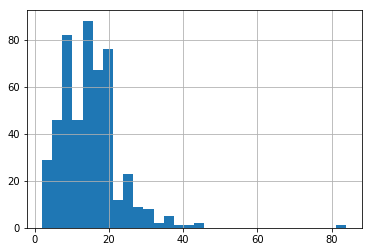

'0.0% de registros nulos'

'Variância: 0.244384765625'

,qtd,pc
1.00,288,0.58
0.00,210,0.42


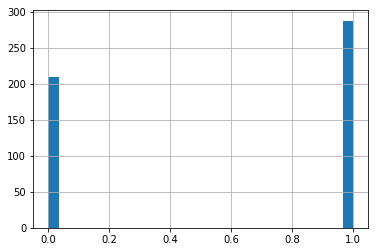

'0.0% de registros nulos'

'Variância: 0.2470703125'

,qtd,pc
1.00,278,0.56
0.00,220,0.44


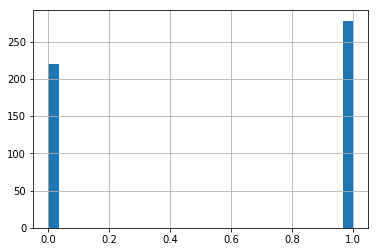

'0.0% de registros nulos'

'Variância: 0.1595458984375'

,qtd,pc
1.00,399,0.80
0.00,99,0.20


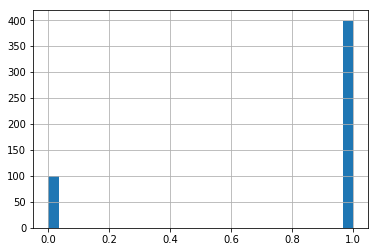

'0.0% de registros nulos'

'Variância: 0.221435546875'

,qtd,pc
0.00,334,0.67
1.00,164,0.33


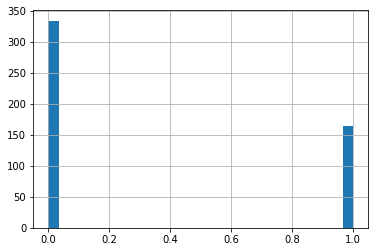

'0.0% de registros nulos'

'Variância: 0.2423095703125'

,qtd,pc
0.00,294,0.59
1.00,204,0.41


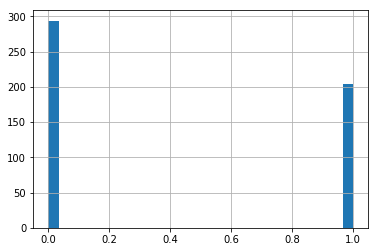

'0.0% de registros nulos'

'Variância: 0.21630859375'

,qtd,pc
1.00,341,0.68
0.00,157,0.32


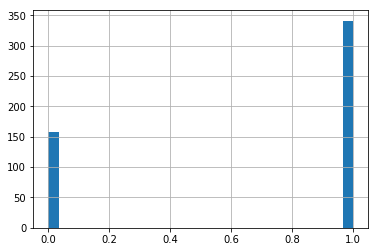

'0.0% de registros nulos'

'Variância: inf'

count   498.00
mean     26.42
std        inf
min       0.00
25%      14.00
50%      22.00
75%      30.75
max     639.00
Name: NU_COMPUTADOR_SCHL, dtype: float64

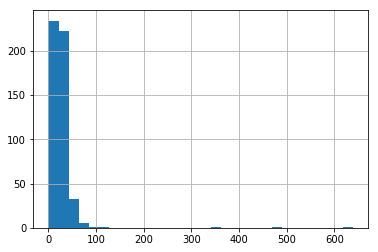

'0.0% de registros nulos'

'Variância: 27.734375'

count   498.00
mean      4.76
std       5.27
min       0.00
25%       2.00
50%       4.00
75%       6.00
max      53.00
Name: NU_COMP_ADMINISTRATIVO_SCHL, dtype: float64

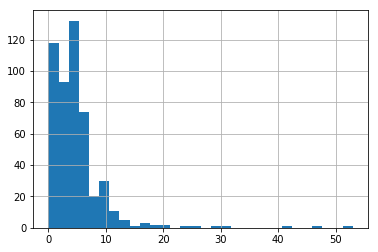

'0.0% de registros nulos'

'Variância: 155.5'

count   498.00
mean     14.32
std      12.47
min       0.00
25%       1.00
50%      14.00
75%      20.00
max      80.00
Name: NU_COMP_ALUNO_SCHL, dtype: float64

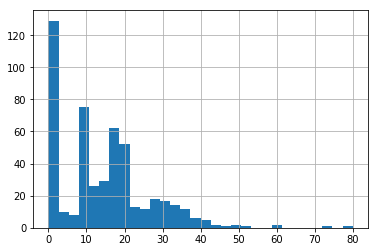

'0.0% de registros nulos'

'Variância: inf'

count   498.00
mean     76.50
std        inf
min      10.00
25%      48.25
50%      70.00
75%      96.00
max     392.00
Name: NU_FUNCIONARIOS_SCHL, dtype: float64

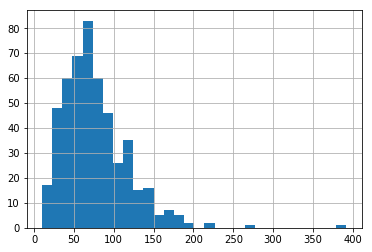

'0.0% de registros nulos'

'Variância: 0.2369384765625'

,qtd,pc
1.00,307,0.62
0.00,191,0.38


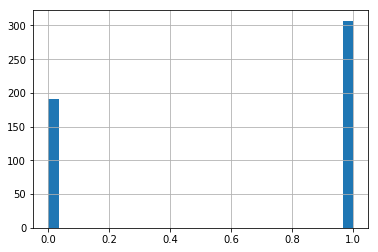

'0.0% de registros nulos'

'Variância: 0.2313232421875'

,qtd,pc
0.00,318,0.64
1.00,180,0.36


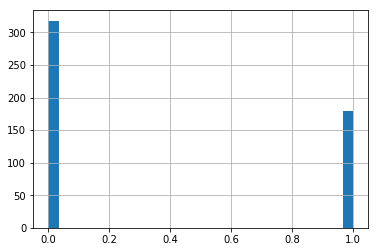

'0.0% de registros nulos'

'Variância: 0.15576171875'

,qtd,pc
0.00,402,0.81
1.00,96,0.19


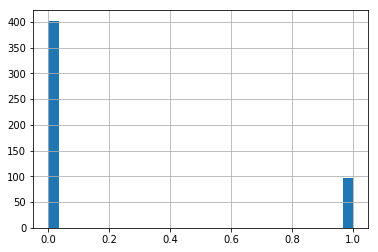

'0.0% de registros nulos'

'Variância: 2.529296875'

count   498.00
mean      5.64
std       1.59
min       2.00
25%       4.64
50%       5.40
75%       6.36
max      17.00
Name: NU_PROP_FUNS_SALAS_UTZD_SCHL, dtype: float64

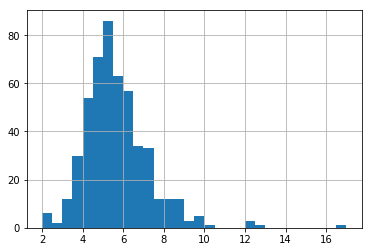

'0.0% de registros nulos'

'Variância: 8.5546875'

count   498.00
mean      2.03
std       2.93
min       0.00
25%       1.11
50%       1.75
75%       2.45
max      60.75
Name: NU_PROP_CPU_SALAS_UTZD_SCHL, dtype: float64

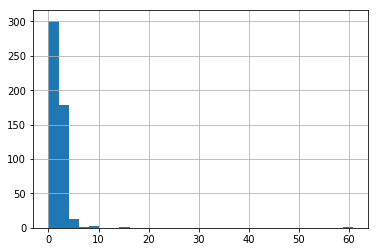

'0.0% de registros nulos'

'Variância: 10163.814873174792'

count   498.00
mean    158.67
std     100.82
min       1.00
25%      86.75
50%     154.50
75%     202.00
max     432.00
Name: NU_QTD_SETORES_CENSITARIOS_SC_SCHL, dtype: float64

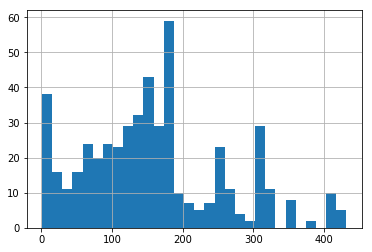

'0.0% de registros nulos'

'Variância: 0.0870361328125'

count   498.00
mean      1.57
std       0.29
min       1.04
25%       1.43
50%       1.52
75%       1.66
max       4.85
Name: NU_MEDIA_DISTANCIA_ESCOLA_SETOR_SC_SCHL, dtype: float64

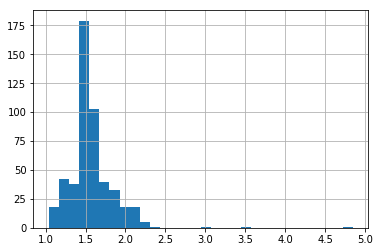

'0.0% de registros nulos'

'Variância: inf'

count     498.00
mean         inf
std          inf
min      1101.00
25%      1915.00
50%      2480.00
75%      5244.00
max     14048.00
Name: NU_MEDIANA_RENDA_MEDIA_SC_SCHL, dtype: float64

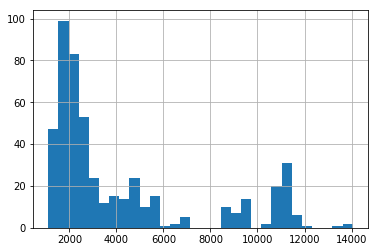

'0.0% de registros nulos'

'Variância: 656.0'

count   498.00
mean       inf
std      25.61
min      34.00
25%     169.00
50%     181.00
75%     189.00
max     215.50
Name: NU_MEDIANA_QTD_DOMICILIOS_SC_SCHL, dtype: float64

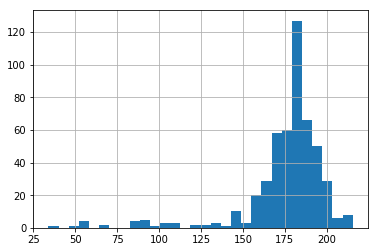

'0.0% de registros nulos'

'Variância: inf'

count   498.00
mean       inf
std        inf
min     105.00
25%     533.50
50%     609.50
75%     668.00
max     769.00
Name: NU_MEDIANA_QTD_PESSOAS_SC_SCHL, dtype: float64

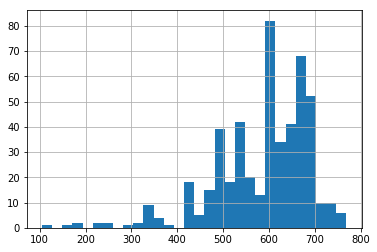

'0.0% de registros nulos'

'Variância: 432951410.8624599'

count      498.00
mean      4302.05
std      20807.48
min     -32721.00
25%     -12024.00
50%       9870.00
75%      21133.00
max      32697.00
Name: NU_SOMA_QTD_DOMICILIOS_SC_SCHL, dtype: float64

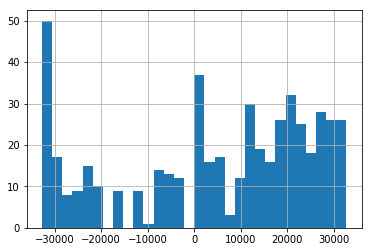

'0.0% de registros nulos'

'Variância: 308962429.78995264'

count      498.00
mean      1614.03
std      17577.33
min     -31623.00
25%     -11291.50
50%       2086.00
75%      15459.00
max      32356.00
Name: NU_SOMA_QTD_PESSOAS_SC_SCHL, dtype: float64

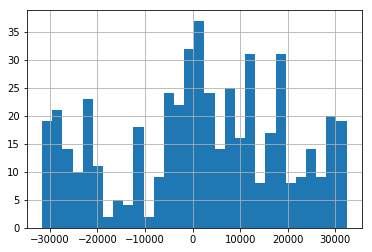

'0.0% de registros nulos'

'Variância: 0.0078277587890625'

count   498.00
mean      0.30
std       0.09
min       0.00
25%       0.27
50%       0.32
75%       0.36
max       0.45
Name: NU_PROP_DOM_ALUGADOS_SC_SCHL, dtype: float64

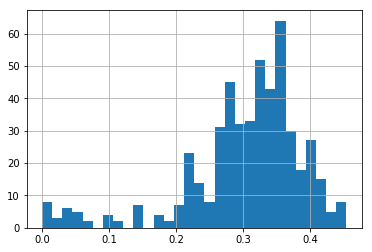

'0.0% de registros nulos'

'Variância: 0.00858306884765625'

count   498.00
mean      0.12
std       0.09
min       0.04
25%       0.08
50%       0.10
75%       0.11
max       1.00
Name: NU_PROP_DOM_CEDIDOS_SC_SCHL, dtype: float64

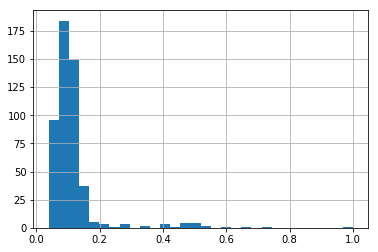

'0.0% de registros nulos'

'Variância: 0.0009679794311523438'

count   498.00
mean      0.04
std       0.03
min       0.00
25%       0.01
50%       0.04
75%       0.06
max       0.17
Name: NU_PROP_DOM_EM_AQUISICAO_SC_SCHL, dtype: float64

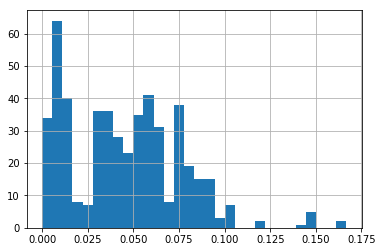

'0.0% de registros nulos'

'Variância: 0.0552978515625'

count   498.00
mean      0.19
std       0.24
min       0.00
25%       0.02
50%       0.06
75%       0.24
max       0.71
Name: NU_PROP_DOM_RENDA_PERCAPITA_ACIMA_5SM_SC_SCHL, dtype: float64

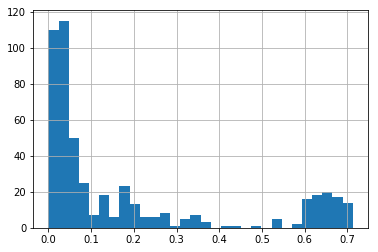

'0.0% de registros nulos'

'Variância: 0.048858642578125'

count   498.00
mean      0.39
std       0.22
min       0.02
25%       0.20
50%       0.41
75%       0.55
max       0.82
Name: NU_PROP_DOM_RENDA_PERCAPITA_ABXO_1SM_SC_SCHL, dtype: float64

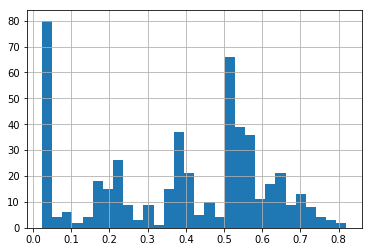

'0.0% de registros nulos'

'Variância: 0.00047135353088378906'

count   498.00
mean      0.52
std       0.02
min       0.40
25%       0.51
50%       0.52
75%       0.53
max       0.55
Name: NU_PROP_PSS_MULHERES_SC_SCHL, dtype: float64

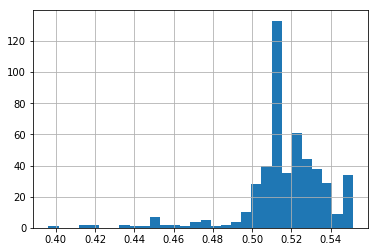

'0.0% de registros nulos'

'Variância: 0.0005521774291992188'

count   498.00
mean      0.13
std       0.02
min       0.02
25%       0.12
50%       0.13
75%       0.14
max       0.18
Name: NU_PROP_PSS_MULHERES_RSP_SC_SCHL, dtype: float64

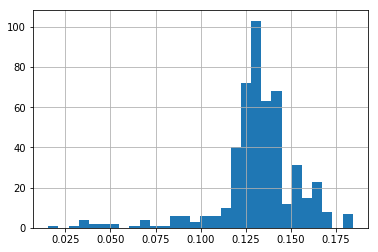

'0.0% de registros nulos'

'Variância: 0.0019092559814453125'

count   498.00
mean      0.19
std       0.04
min       0.11
25%       0.16
50%       0.20
75%       0.22
max       0.30
Name: NU_PROP_PSS_ABXO_12ANOS_SC_SCHL, dtype: float64

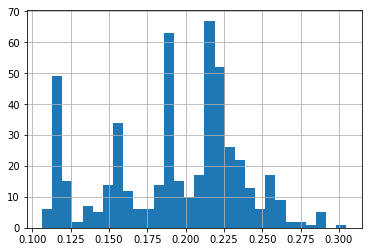

'0.0% de registros nulos'

'Variância: 0.0007843971252441406'

count   498.00
mean      0.06
std       0.03
min       0.01
25%       0.03
50%       0.05
75%       0.07
max       0.15
Name: NU_PROP_PSS_ACIMA_65ANOS_SC_SCHL, dtype: float64

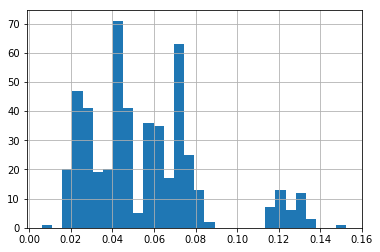

'0.0% de registros nulos'

'Variância: 8.940696716308594e-07'

count   498.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.01
Name: NU_PROP_PSS_ACIMA_90ANOS_SC_SCHL, dtype: float64

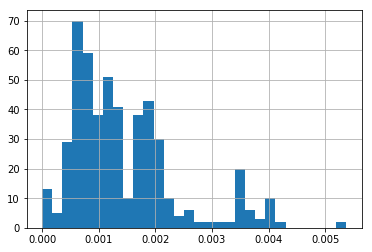

'0.0% de registros nulos'

Não foi possível calcular a variância.


,qtd,pc
31,141,0.28
30,102,0.20
1,93,0.19
0,89,0.18
2,73,0.15


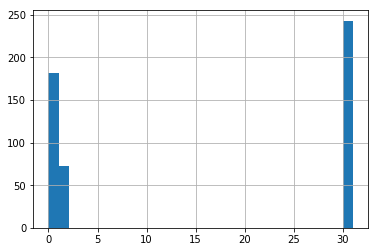

In [17]:
Visualizacao.explora_df(schl.drop(['NU_LATITUDE_SCHL','NU_LONGITUDE_SCHL'],axis=1))

#### Algumas observações:
- 133 escolas não possuíam pátio coberto, como será que os alunos comiam em dias chuvosos?
- A maior escola tinha 84 salas de aula, a menor só tinha duas.
- Mesmo sendo um equipamento ultrapassado 52% das escolas possuíam vídeo cassete e, por outro lado, somente 33% (164) possuíam impressora multifuncional.
- 25% das escolas possuem um ou menos computador para os alunos.
- O número de funcionários segue uma distribuição assimétrica POSITIVA OU NEGATIVA?


### 2.2 Análise geográfica das saídas

Aonde ficam as escolas com as maiores taxas de saída?


#### 2.2.1 Montar a variável _turn over_ que mede a proporção de professores que saíram de uma escola

In [18]:
#criacao da variavel TURN OVER
a = mv.reset_index().groupby('CO_ENTIDADE').IN_SAIU_ESCOLA.sum()
b = mv.reset_index().groupby('CO_ENTIDADE').CO_PESSOA_FISICA.count()
schl['TURN_OVER'] = a/b

#### 2.2.2 Análise do _turn over_

count   498.00
mean      0.24
std       0.20
min       0.00
25%       0.09
50%       0.20
75%       0.33
max       1.00
Name: TURN_OVER, dtype: float64

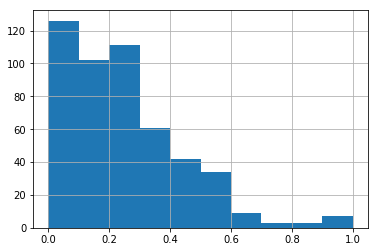

In [19]:
#resumo da variavel
display(schl.TURN_OVER.describe())
schl.TURN_OVER.hist();

In [20]:
#Plotagem das faixas do quantis do turnover.
#Divide o TURN OVER em 5 faixas
schl['FX_TURN_OVER'] = pd.qcut(schl.TURN_OVER, 5, labels=False)

#plota o mapa
lclz_praca_3_poderes = [-15.7994, -47.8613]
mapa = folium.Map(location=lclz_praca_3_poderes, zoom_start=10)
cores = ['blue', 'green','orange', 'purple', 'red']
for ltg,lng,fx in schl[['NU_LATITUDE_SCHL','NU_LONGITUDE_SCHL','FX_TURN_OVER']].values:
    folium.Marker([ltg,lng],icon=folium.Icon(color=cores[int(fx)-1],icon='map-marker-alt')).add_to(mapa)
mapa

#### Algumas observações:

- Mesmo havendo alguns pontos vermelhos nas extremidades, pareceu-me que os pontos estão bem distribuídos pelo mapa.
- Logo a localização da escola não é, por si só, motivo de saída.

### 2.3 Gráficos bivariados

#### 2.3.1 Será que os turn overs estão relacionados com o tamanho da escola?

In [21]:
#plota a correlação entre a quantidade de funcionários da escola, quantidade de salas existentes e o turnover
Visualizacao.plota_matriz_heatmap( schl[['NU_FUNCIONARIOS_SCHL','NU_SALAS_EXISTENTES_SCHL','TURN_OVER']].corr()) 

,NU_FUNCIONARIOS_SCHL,NU_SALAS_EXISTENTES_SCHL,TURN_OVER
NU_FUNCIONARIOS_SCHL,1,0.8,0.0086
NU_SALAS_EXISTENTES_SCHL,0.8,1,0.0069
TURN_OVER,0.0086,0.0069,1


A correlação parece mostrar que não.

#### 2.3.2 Será que os dados do entorno da escola estão conectados com o turn over?

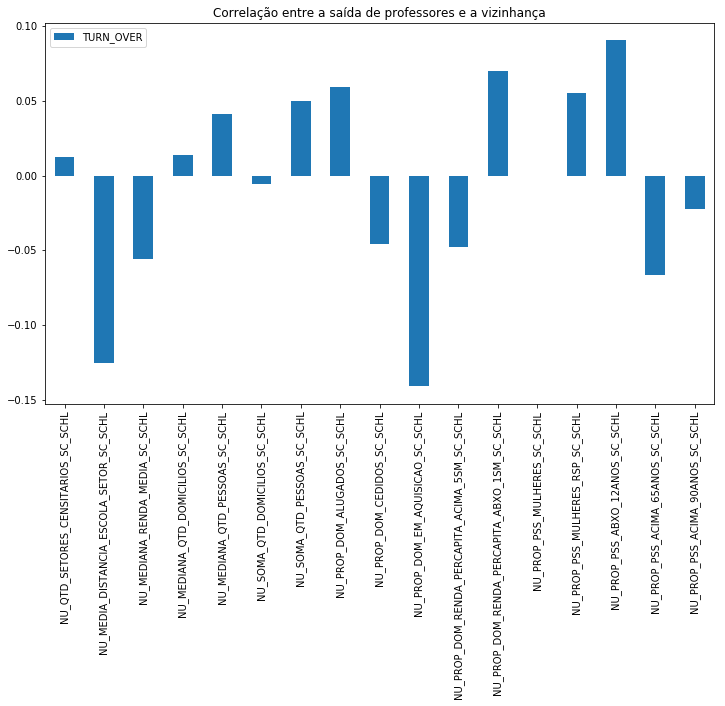

In [22]:
#seleciona as colunas de setores sensitários, dropa a linha do turnover e plota o gráfico de barras
schl[
        [col for col in schl.columns 
         if col.endswith('SC_SCHL')
         or col == 'TURN_OVER']].corr()[['TURN_OVER']].drop('TURN_OVER')\
            .plot.bar(
                        title='Correlação entre a saída de professores e a vizinhança', 
                        figsize=(12,7));


A baixa amplitude das correlações indica que o entorno da escola parece não estar correlacionado com o turnover.

#### 2.3.3 Qual a faixa etária dos professores que saem?

,NU_IDADE_REFERENCIA_PROF,IN_SAIU_ESCOLA
NU_IDADE_REFERENCIA_PROF,1.00,-0.18
IN_SAIU_ESCOLA,-0.18,1.00


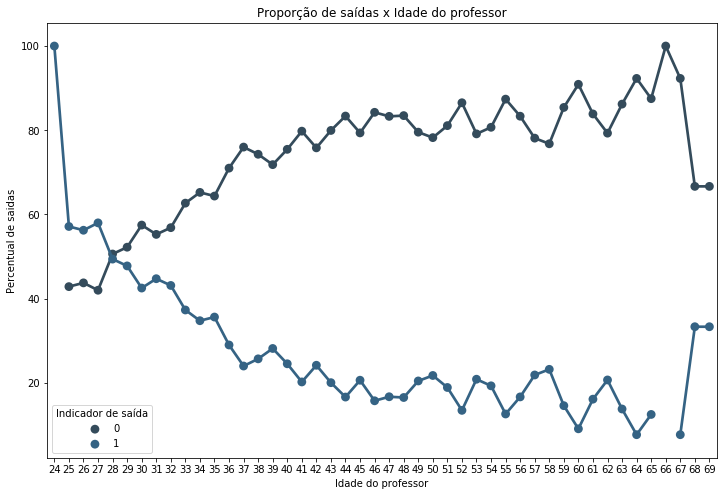

In [23]:
#vamos agregar os dados por idade e ver a proporção dos que saíram em relação ao total da referida idade.
#agrupa por idade e saída
def monta_dados_grafico_idade(m):
    a = m.reset_index()\
        .groupby(['NU_IDADE_REFERENCIA_PROF','IN_SAIU_ESCOLA'])[['CO_PESSOA_FISICA']]\
        .count()\
        .reset_index()
    a.columns = ['Idade do professor','Indicador de saída','Qtd']
    #total de professores com a referida idade.
    b = m.groupby('NU_IDADE_REFERENCIA_PROF')['IN_SAIU_ESCOLA'].count()
    #cria a coluna de proporção
    a['Percentual de saidas'] = 0
    #percorre as idades e calcula as proporções
    for q in b.reset_index().values:
        c = a.loc[a['Idade do professor'] == q[0]]
        a.loc[a['Idade do professor'] == q[0],'Percentual de saidas'] = c['Qtd']/q[1] * 100
    return a
#plotagem
#define um tamanho de gráfico agradável para visualização
plt.figure(figsize=(12,8))
plt.title('Proporção de saídas x Idade do professor')
sns.set_palette('Blues_d')
sns.pointplot(data=monta_dados_grafico_idade(mv),
              x='Idade do professor',
              y='Percentual de saidas',
              hue='Indicador de saída',);
mv[['NU_IDADE_REFERENCIA_PROF','IN_SAIU_ESCOLA']].corr()

#### Temos um indicativo:
Os professores mais novos parecem que saem mais. 

E isso faz bastante sentido, pois a tendência é a pessoa estabilizar em algum lugar.

#### 2.3.4 Onde os professores mais velhos lecionam?

In [24]:
#divide em quartis
mv['FX_IDADE'] = pd.qcut(mv.NU_IDADE_REFERENCIA_PROF,4,labels=['1','2','3','4'])
display(mv.head(1000).FX_IDADE.value_counts())

#plota o mapa
lclz_praca_3_poderes = [-15.7994, -47.8613]
mapa = folium.Map(location=lclz_praca_3_poderes, zoom_start=10)
cores = ['blue', 'green', 'purple', 'red']
for ltg,lng,fx in mv[['NU_LATITUDE_SCHL','NU_LONGITUDE_SCHL','FX_IDADE']].head(1000).values:
    folium.Marker([ltg,lng],icon=folium.Icon(color=cores[int(fx)-1],icon='map-marker-alt')).add_to(mapa)
mapa

4    275
3    249
1    249
2    227
Name: FX_IDADE, dtype: int64

#### 2.3.5 As escolas com melhor infraestrutura estão em lugares com maior renda?

Vamos investigar se o governo do Distrito Federal equipa melhor as escolas com uma vizinhança mais abastada.

Variáveis que utilizei:

Para infraestrutura utilizei as features que entendi serem mais representativas de uma escola bem estruturada. 

Para os setores sensitários utilizei as features mais representativas de renda. O percentual de pessoas acima de 65 anos tem bastante correlação com a renda (ricos vivem mais, além disso idosos geralmente possuem uma renda própria).


In [25]:
#features de infraestrutura da escola
features_infra = [
    'IN_LABORATORIO_INFORMATICA_SCHL',
    'IN_LABORATORIO_CIENCIAS_SCHL',
    'IN_QUADRA_ESPORTES_COBERTA_SCHL',
    'IN_BIBLIOTECA_SALA_LEITURA_SCHL',
    'IN_PARQUE_INFANTIL_SCHL',
    'IN_BANHEIRO_PNE_SCHL',
    'IN_AUDITORIO_SCHL',
    'IN_EQUIP_IMPRESSORA_MULT_SCHL',
    'NU_COMPUTADOR_SCHL',
    'NU_COMP_ALUNO_SCHL'
]

#features de setores censitários
features_sc = [
    'NU_MEDIANA_RENDA_MEDIA_SC_SCHL',
    'NU_QTD_SETORES_CENSITARIOS_SC_SCHL',
    'NU_SOMA_QTD_PESSOAS_SC_SCHL',
    'NU_PROP_PSS_ACIMA_65ANOS_SC_SCHL'
    
]
b = schl[features_infra + features_sc].copy()
#Soma os indicadores de infraestrutura
b['Qtd itens infra'] = np.sum(b[[col for col in features_infra if col.startswith('IN_')]],axis=1)
#Deleta as colunas de indicadores
b.drop([col for col in features_infra if col.startswith('IN_')],axis=1,inplace=True)
#Renomeia as colunas para deixar os gráficos mais "simpáticos"
b.rename(columns={'NU_COMPUTADOR_SCHL': 'Qtd Computadores',
                   'NU_COMP_ALUNO_SCHL': 'Qtd cpu alunos',
                   'NU_MEDIANA_RENDA_MEDIA_SC_SCHL' : 'Renda',
                   'NU_QTD_SETORES_CENSITARIOS_SC_SCHL' : 'Qtd Setores',
                   'NU_PROP_PSS_ACIMA_65ANOS_SC_SCHL' : '% pessoas 65 +',
                   'NU_SOMA_QTD_PESSOAS_SC_SCHL' : 'População' },inplace=True)

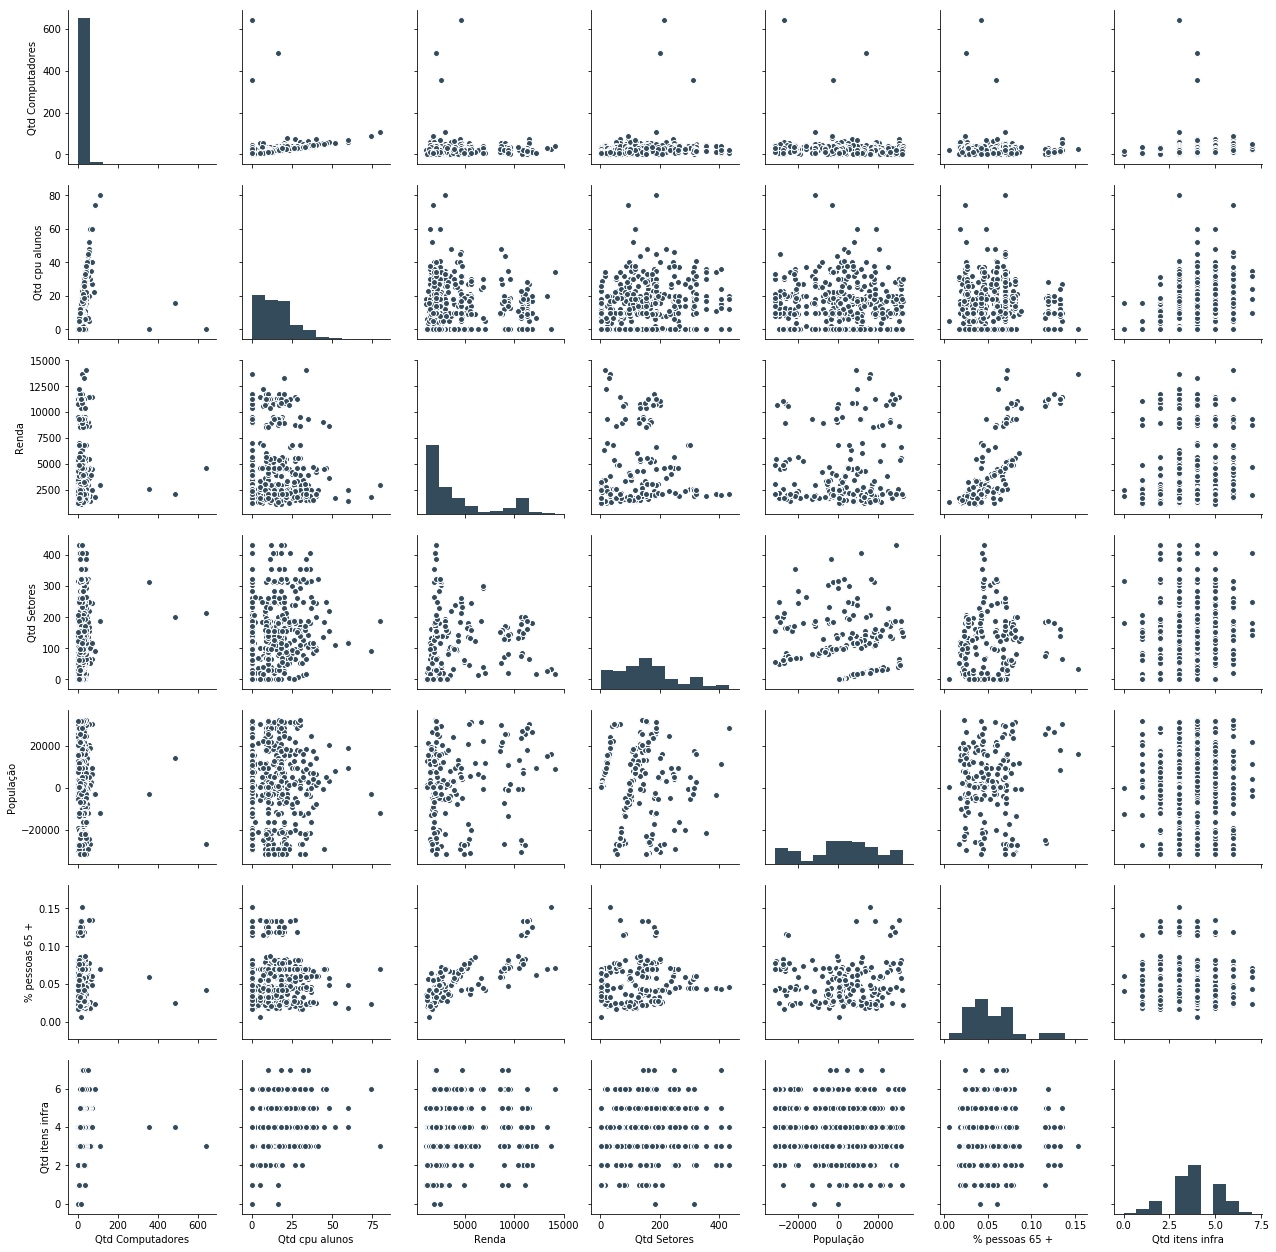

In [26]:
sns.pairplot(b);

Muito bem GDF, há indícios de não existir diferença na estrutura de escolas públicas devido a vizinhança!

Vamos plotar a matriz de correlação para aumentarmos a certeza do que estamos falando.

In [27]:
Visualizacao.plota_matriz_heatmap(b.corr())

,Qtd Computadores,Qtd cpu alunos,Renda,Qtd Setores,População,% pessoas 65 +,Qtd itens infra
Qtd Computadores,1,0.23,-0.034,0.098,-0.066,-0.054,0.12
Qtd cpu alunos,0.23,1,-0.021,0.15,-0.023,-0.031,0.38
Renda,-0.034,-0.021,1,-0.033,0.31,0.82,0.0052
Qtd Setores,0.098,0.15,-0.033,1,0.021,0.096,0.075
População,-0.066,-0.023,0.31,0.021,1,0.23,-0.036
% pessoas 65 +,-0.054,-0.031,0.82,0.096,0.23,1,-0.037
Qtd itens infra,0.12,0.38,0.0052,0.075,-0.036,-0.037,1


Aparentemente os recursos governamentais da área da educação estão bem distribuídos no DF, se fôssemos fazer uma crítica seria somente à pequena correlação negativa entre a quantidade de computadores para alunos e a população na vizinhança, entretanto isso pode ter a ver com alguns outliers que podem ser vistos no pairplot acima.

### 3. Gráficos finais

Os gráficos que mais me chamaram a atenção para responder a questão inicial foram:

#### 3.1 Proporção de saídas x Idade do professor
Aqui adicionei o histograma (feito com um gráfico e barras) para visualizar o total de professores com a respectiva idade.

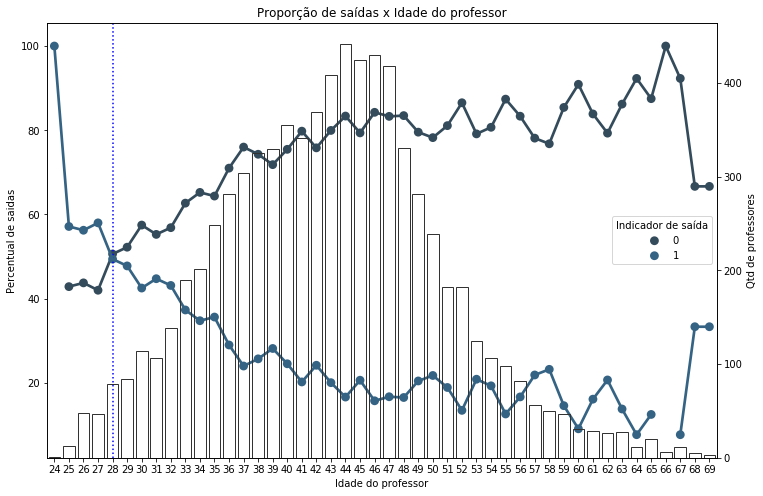

In [28]:
#Proporção de saídas x Idade do professor
#define um tamanho de gráfico agradável para visualização
fig, ax = plt.subplots(figsize = (12,8))

#titulo do grafico
plt.title('Proporção de saídas x Idade do professor')
#desenha a linha vertical
ax.axvline(x=4,linestyle=':',color='b')
#seta o eixo secundario
ax2 = ax.twinx()
#dados do grafico de barras (o histograma nao ficou legal).
d  = pd.DataFrame(prof.NU_IDADE_REFERENCIA_PROF.value_counts().sort_index())
d.reset_index(inplace=True)
d.columns = ['Idade do professor', 'Qtd de professores']
#plota o grafico de barras
sns.barplot(x='Idade do professor',y='Qtd de professores',data=d,ax=ax2,color='k',facecolor=(1, 1, 1, 0),edgecolor=".2")
#plotagem
sns.pointplot(data=monta_dados_grafico_idade(mv),
              x='Idade do professor',
              y='Percentual de saidas',
              hue='Indicador de saída',ax=ax);
plt.show()

#### 3.2 Faixa de idade do professor x Localização da escola

In [29]:
#Idade do professor x Localização da escola
lclz_praca_3_poderes = [-15.7994, -47.8613]
mapa = folium.Map(location=lclz_praca_3_poderes, zoom_start=10)
#Primeiro quartil será o azul, o segundo verde o terceiro rosa e o último o vermelho.
cores = ['blue', 'green', 'purple', 'red']
for ltg,lng,fx in mv[['NU_LATITUDE_SCHL','NU_LONGITUDE_SCHL','FX_IDADE']].head(1000).values:
    folium.Marker([ltg,lng],icon=folium.Icon(color=cores[int(fx)-1],icon='map-marker-alt')).add_to(mapa)
mapa

#### Observação interessante:
Esses dois gráficos em conjunto mostram algo bastante interessante: os professores de mais idade (_pins_ vermelhos) dão aula em escolas mais centrais, ou provavelmente perto de onde residem (região da Samambaia), enquanto os mais novos (mais fortemente os _pins_ azuis  e, em menor medida, os verdes) estão distribuídos em regiões mais afastadas.


#### 3.3 Modelagem 

Será que somente a idade é influenciadora da transferência? 

Vamos rodar dois algoritmos de Machine Learning que possuem o _feature importance_ para verificar quais outras variáveis impactam na hora de pedir transferência.



In [30]:
#selecao de features
df_mod = mv.drop(['NU_LATITUDE_SCHL','NU_LONGITUDE_SCHL'],axis=1).copy()
#ajuste nos tipos das colunas
for col in df_mod.columns:
    if col.startswith('IN_'):
        df_mod[col] = pd.Categorical(df_mod[col])

#modelos de árvores são pouco propensos a viés por não normalização, portanto pularemos 
#essa parte.

In [31]:
#verifica a quantidade de nulos
df_mod[df_mod.isnull().any(axis=1)].shape

(4, 82)

In [32]:
#somente 4 linhas, então podemos apagá-las sem dor na consciência.
display(df_mod.shape)
df_mod.dropna(inplace=True)
df_mod.shape

(8187, 82)

(8183, 82)

Não irei me aprofundar nos modelos pois está fora do escopo desse trabalho (e poderia ser tema, de no mínimo, uma dissertação), mas veremos que a modelagem simples já ajudará um pouco.

/home/itsbarreto/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Base de TREINO
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      4654
          1       0.99      0.92      0.95      1483

avg / total       0.98      0.98      0.98      6137

Base de TESTE
             precision    recall  f1-score   support

          0       0.80      0.92      0.86      1569
          1       0.50      0.25      0.33       477

avg / total       0.73      0.77      0.73      2046



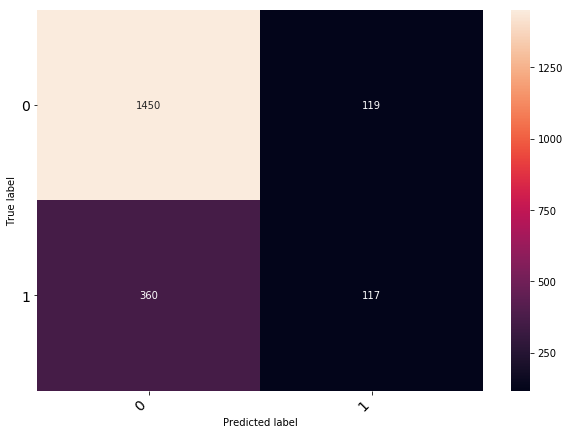

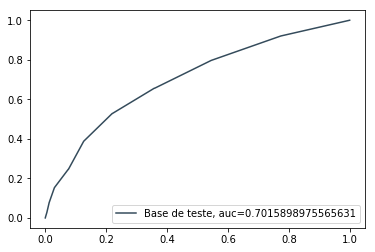

Feature ranking:
1. feature NU_QTD_VEZES_PROF_ESC (0.085746)
2. feature NU_IDADE_REFERENCIA_PROF (0.062368)
3. feature NU_MEDIA_TURMAS_NU_QTD_ALUNOS (0.045010)
4. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0 (0.038442)
5. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_9 (0.029154)
6. feature CO_CLUSTER_PROF (0.028031)
7. feature FX_IDADE (0.026944)
8. feature NU_QTD_TURMAS_PROF_ESCOLA (0.024768)
9. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_3 (0.021622)
10. feature NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS (0.021503)
11. feature NU_QTD_TURMAS_IN_TURNO_1 (0.020852)
12. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2 (0.020728)
13. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_7 (0.019969)
14. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_1 (0.019720)
15. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_4 (0.019478)
16. feature NU_FUNCIONARIOS_SCHL (0.018869)
17. feature NU_COMPUTADOR_SCHL (0.018301)
18. feature NU_QTD_TURMAS_IN_TURNO_0 (0.017581)
19. feature NU_PROP_DOM_ALUGADOS_SC_SCHL (0.0

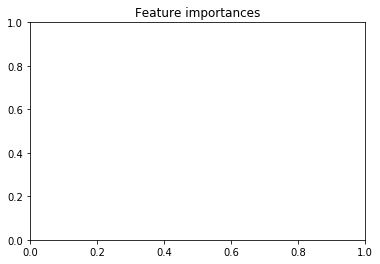

In [33]:
import modelagem
#modela com Random Forest
ft_rf,_ = modelagem.processa_tudo(df_mod,tg='IN_SAIU_ESCOLA',vai_escalar=False);

/home/itsbarreto/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/itsbarreto/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/itsbarreto/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Base de TREINO
             precision    recall  f1-score   support

          0       0.82      0.96      0.88      4654
          1       0.74      0.31      0.44      1483

avg / total       0.80      0.81      0.78      6137

Base de TESTE
             precision    recall  f1-score   support

          0       0.81      0.95      0.87      1569
          1       0.62      0.25      0.36       477

avg / total       0.76      0.79      0.75      2046



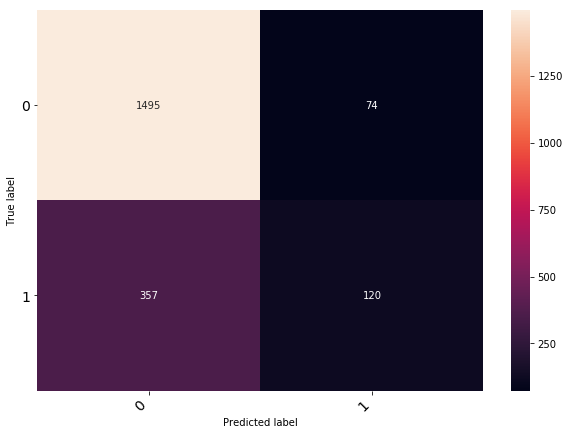

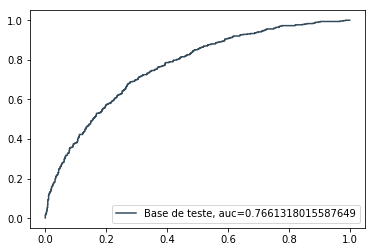

Feature ranking:
1. feature NU_IDADE_REFERENCIA_PROF (0.092913)
2. feature NU_QTD_VEZES_PROF_ESC (0.092913)
3. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0 (0.048819)
4. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2 (0.040945)
5. feature NU_FUNCIONARIOS_SCHL (0.036220)
6. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_4 (0.034646)
7. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_6 (0.034646)
8. feature NU_PROP_DOM_ALUGADOS_SC_SCHL (0.029921)
9. feature NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS (0.029921)
10. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_9 (0.028346)
11. feature NU_PROP_DOM_EM_AQUISICAO_SC_SCHL (0.028346)
12. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_5 (0.025197)
13. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_8 (0.025197)
14. feature NU_COMPUTADOR_SCHL (0.025197)
15. feature NU_MEDIA_TURMAS_NU_QTD_ALUNOS (0.023622)
16. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_7 (0.023622)
17. feature NU_SOMA_QTD_PESSOAS_SC_SCHL (0.023622)
18. feature NU_SOMA_QTD_DOMICILIOS_SC_S

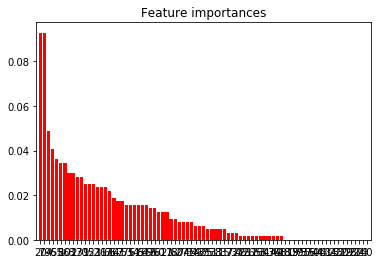

In [34]:
import xgboost as xgb
#modelagem com xgboost
xgb_clf = xgb.XGBClassifier()
ft_xgb,_ = modelagem.processa_tudo(df_mod,tg='IN_SAIU_ESCOLA',vai_escalar=False,clf=xgb_clf)

#### Observações interessantes:

Mesmo havendo um claro _overfit_ um AUC de 70 e 76,6 para o RandomForest e para o XGBoost respectivamente, são dados interessantes uma vez que os modelos estão sem hiperparametrização. 

Vamos executar os algoritmos só com as 15 _features_ mais significativas de cada modelo para então compará-las.


In [35]:
QTD_FEATURES_MAIS_IMPORTANTES = 15

/home/itsbarreto/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Base de TREINO
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      4654
          1       0.99      0.92      0.95      1483

avg / total       0.98      0.98      0.98      6137

Base de TESTE
             precision    recall  f1-score   support

          0       0.80      0.92      0.86      1569
          1       0.47      0.23      0.31       477

avg / total       0.72      0.76      0.73      2046



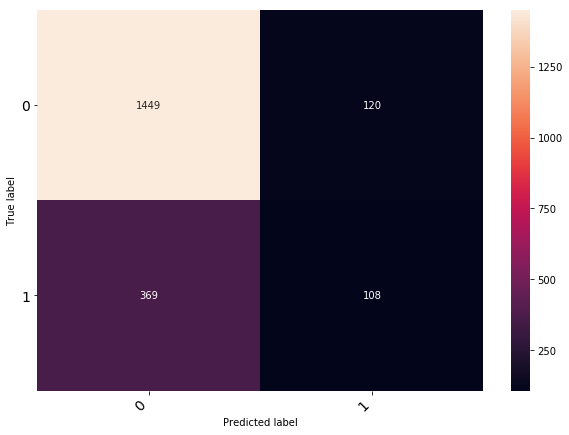

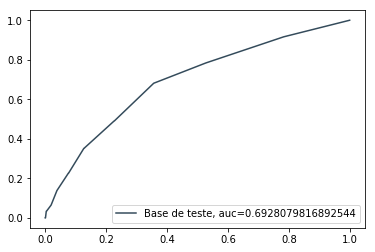

Feature ranking:
1. feature NU_QTD_VEZES_PROF_ESC (0.115116)
2. feature NU_IDADE_REFERENCIA_PROF (0.113479)
3. feature NU_MEDIA_TURMAS_NU_QTD_ALUNOS (0.108628)
4. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_9 (0.084828)
5. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0 (0.082495)
6. feature CO_CLUSTER_PROF (0.068186)
7. feature NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS (0.064226)
8. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_3 (0.062940)
9. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_1 (0.050463)
10. feature NU_QTD_TURMAS_PROF_ESCOLA (0.048721)
11. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2 (0.047464)
12. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_7 (0.045754)
13. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_4 (0.043182)
14. feature NU_QTD_TURMAS_IN_TURNO_1 (0.034229)
15. feature FX_IDADE (0.030289)
Nao foi possivel plotar o feature importance.
The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


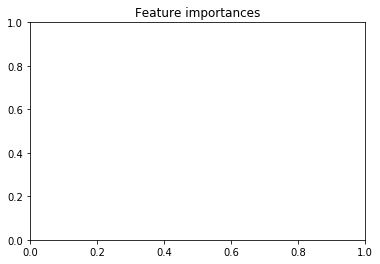

In [36]:
#seleciona as 15 features mais importantes de cada modelo.
cols_imp_rf = ft_rf[:QTD_FEATURES_MAIS_IMPORTANTES] + ['IN_SAIU_ESCOLA']
#modelagem RandomForest
ft_15_rf,_ = modelagem.processa_tudo(df_mod[cols_imp_rf],tg='IN_SAIU_ESCOLA',vai_escalar=False);

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/itsbarreto/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/itsbarreto/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Base de TREINO
             precision    recall  f1-score   support

          0       0.81      0.96      0.88      4654
          1       0.72      0.30      0.42      1483

avg / total       0.79      0.80      0.77      6137

Base de TESTE
             precision    recall  f1-score   support

          0       0.81      0.95      0.87      1569
          1       0.62      0.25      0.36       477

avg / total       0.76      0.79      0.75      2046



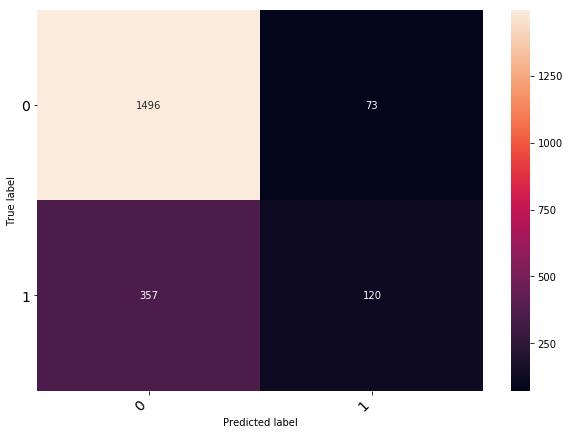

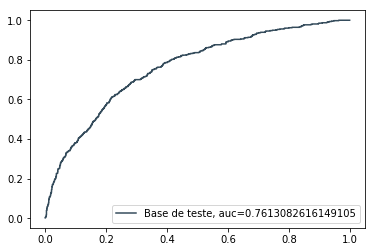

Feature ranking:
1. feature NU_IDADE_REFERENCIA_PROF (0.126023)
2. feature NU_QTD_VEZES_PROF_ESC (0.108020)
3. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0 (0.088380)
4. feature NU_PROP_DOM_ALUGADOS_SC_SCHL (0.073650)
5. feature NU_PROP_DOM_EM_AQUISICAO_SC_SCHL (0.072013)
6. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2 (0.072013)
7. feature NU_MEDIA_TURMAS_NU_QTD_ALUNOS (0.070376)
8. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_8 (0.067103)
9. feature NU_COMPUTADOR_SCHL (0.063830)
10. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_9 (0.052373)
11. feature NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS (0.052373)
12. feature NU_FUNCIONARIOS_SCHL (0.052373)
13. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_6 (0.039280)
14. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_4 (0.032733)
15. feature NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_5 (0.029460)


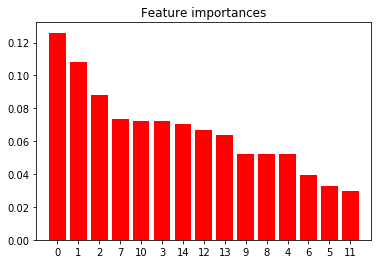

In [37]:
cols_imp_xgb = ft_xgb[:QTD_FEATURES_MAIS_IMPORTANTES] + ['IN_SAIU_ESCOLA']
#reinicializa o classificador do xgboost
xgb_clf = xgb.XGBClassifier()
#modelagem RandomForest
ft_15_xgb,_ = modelagem.processa_tudo(df_mod[cols_imp_xgb],tg='IN_SAIU_ESCOLA',vai_escalar=False,clf=xgb_clf);

Como o AUC foi próximo do anterior irei comparar as 15 features.

Por simplicidade irei me aprofundar nas estão em ambos os classificadores são as mais importantes.

In [52]:
#seleciona as colunas que estão em ambas as listas de features.
cols_coincidentes = [{
                    'Nome da feature ' : f,
                    'Importância RF' : ft_15_rf.index(f) + 1,
                    'Importância XGB' : ft_15_xgb.index(f) + 1} for f in ft_15_rf if f in ft_15_xgb ]
print('Há %.2f%% de coincidências.' %(len(cols_coincidentes)/15 * 100))
print('Colunas em que há correspondência: ')
pd.DataFrame(cols_coincidentes)

Há 53.33% de coincidências.
Colunas em que há correspondência: 


,Importância RF,Importância XGB,Nome da feature
0,1,2,NU_QTD_VEZES_PROF_ESC
1,2,1,NU_IDADE_REFERENCIA_PROF
2,3,7,NU_MEDIA_TURMAS_NU_QTD_ALUNOS
3,4,10,NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_9
4,5,3,NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0
5,7,11,NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS
6,11,6,NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2
7,13,14,NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_4


#### Observações interessantes:

01. NU_IDADE_REFERENCIA_PROF: A idade, como esperado, aparece em primeiro no XGB e em segundo no RF.
<br/><br/>
02. NU_QTD_VEZES_PROF_ESC: A quantidade de vezes que o conjunto professor/escola apareceram nos arquivos estudados, também bastante esperado, afinal se o professor está há muito tempo na escola é bastante provável que continue lá.
<br/><br/>
03. NU_MEDIA_TURMAS_NU_QTD_ALUNOS: quantidade média de alunos nas turmas em que o professor dá aula na escola. Pode representar super lotação, mas também pode ser referente a turmas de alunos mais velhos afinal turmas de Educação Infantil possuem bem menos alunos que turmas do Ensino Médio.
<br/><br/>
04. NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_9: média da proporção de alunos de rótulo 9 em relação ao total de alunos da turma. Do arquivo MontagemDasBases.ipynb vemos que rótulo 9 é: 
<ul>
<li><strong>Classe 9 - 35.864 alunos</strong>
<ul>
<li>37% Cor branca </li>
<li>57% cor n&atilde;o declarada</li>
<li>Mediana em 12 anos</li>
<li>S&eacute;rie n&atilde;o informada</li>
<li>N&atilde;o est&aacute; na idade correta</li>
</ul>
</li>
</ul>
Pelo senso comum diria que pequenos repetentes fazem os professores sairem da escola.
<br/><br/>
05. NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0: assim como no rótulo 9:
<ul>
<li><strong>Classe 0 - 41.214 alunos</strong>
<ul>
<li>Cor parda</li>
<li>Mediana em 15 anos, maior variabilidade.</li>
<li>56% em s&eacute;rie n&atilde;o informada</li>
<li>8% no Ensino m&eacute;dio</li>
<li>30% est&aacute; no EJA</li>
<li>N&atilde;o est&aacute; na idade correta</li>
</ul>
</li>
</ul>
Pelo senso comum diria que grandes repetentes fazem os professores sairem da escola.
<br/><br/>
06. NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS: a quantidade média de disciplinas em cada uma das turmas que o professor dá aula na escola. Possivelmente se refere a séries mais avançadas (alunos do Ensino Médio tem mais matérias que no Ensino Infantil).
<br/><br/>
07. NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2: assim como os anteriores
<ul>
<li><strong>Classe 2 - 26.691 alunos</strong>
<ul>
<li>2&ordf; menor grupo</li>
<li>13% Cor branca</li>
<li>81% cor n&atilde;o declarada</li>
<li>Grupo mais velho, mediana em 20 anos</li>
<li>N&atilde;o est&aacute; na idade correta</li>
<li>91% Est&aacute; no EJA</li>
</ul>
</li>
</ul>
Turmas de EJA com alunos mais velhos em turmas que possivelmente são noturnas, mais uma vez os repetentes...
<br/><br/>
08. NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_4: assim como os anteriores.
<ul>
<li><strong>Classe 4 - 33.712 alunos</strong>
<ul>
<li>94% cor n&atilde;o declarada</li>
<li>Ensino infantil / primeiros anos do fundamental (antigo prim&aacute;rio)</li>
<li>Alunos mais jovens (mediana em 8 anos)</li>
<li>92% est&aacute; na idade correta</li>
</ul>
</li>
</ul>
Crianças pequenas. Provavelmente ajudam a manter o professor na escola.



## 4. Sumário e reflexão

### 4.1 Melhoria nos dados

#### 4.1.1 Geolocalização

Várias escolas não possuem geolocalização ou ainda está de forma imprecisa, pois não foi de fonte oficial. No site do InepData há a informação de que no senso de 2018 constará essa informação.

#### 4.1.2 Distância entre a casa do professor e a escola

Provavelmente essa informação é muito relevante para entendermos o porquê o professor escolhe alguma escola para trabalhar.

### 4.2 Descobertas

Aparentemente os professores iniciam a carreira dando aulas para turmas com maior número de alunos repetentes em escolas de regiões  mais periféricas e depois vão para escolas mais centrais (ou talvez mais próximos de sua residência). 

Além disso outro ponto que merece destaque é que os dados indicam que a infraestrutura das escolas não variam de acordo com a vizinhança, achei isso interessante pois esperava encontrar escolas com melhor infraestrutura em regiões mais ricas.

### 4.3 Trabalhos futuros

Um item seria interessante de aprofundamento é a modelagem, tanto na hiperparametrização do modelo para verificar se o _feature importante_ permanece, quanto na análise das _features_ que não foram objeto de detalhamento nesse estudo.